<a href="https://colab.research.google.com/github/snehuman/Heart_diseases/blob/main/Heart_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score, precision_score
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics


# Pre processing

In [ ]:
heart = pd.read_csv('/content/heart.csv')
heart

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [ ]:
heart["output"].value_counts()

1    165
0    138
Name: output, dtype: int64

# EDA

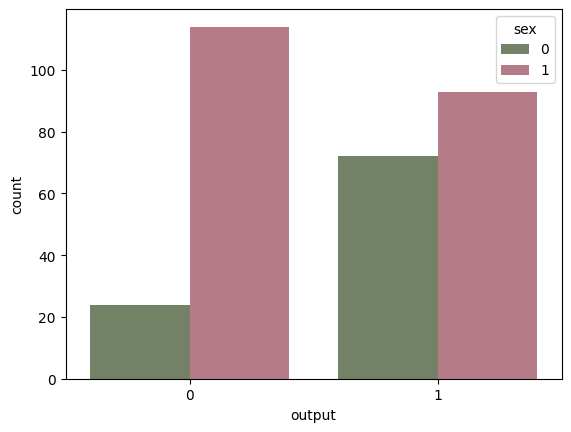

In [ ]:
sns.countplot(data = heart, x = 'output', hue = 'sex',   palette =  ['#738561' , '#BF7180' ] )
plt.show()

<ipython-input-163-8b3014831328>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['trtbps'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<Axes: xlabel='trtbps', ylabel='Density'>

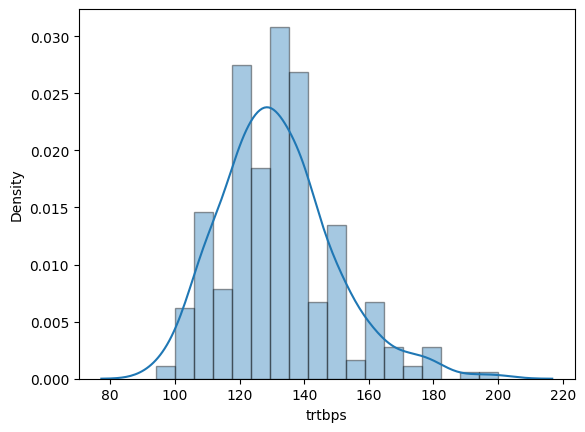

In [ ]:
sns.distplot(heart['trtbps'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<ipython-input-162-4d6e9e0c3aab>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['chol'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<Axes: xlabel='chol', ylabel='Density'>

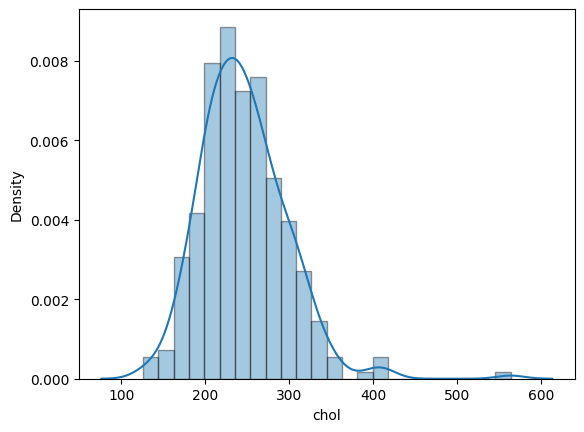

In [ ]:
sns.distplot(heart['chol'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<ipython-input-159-d6e5602109b5>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heart['age'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))


<Axes: xlabel='age', ylabel='Density'>

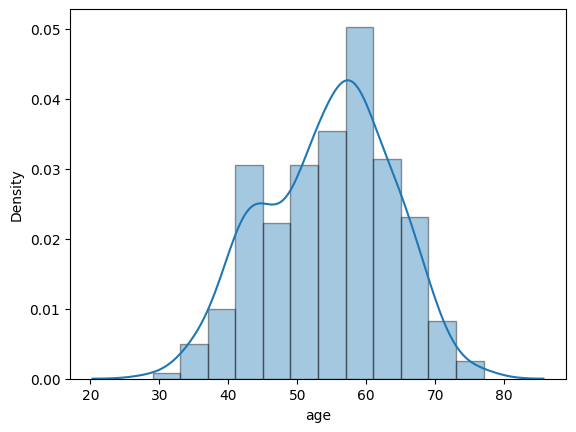

In [ ]:
sns.distplot(heart['age'], hist_kws = dict(linewidth = 1, edgecolor = 'k'))

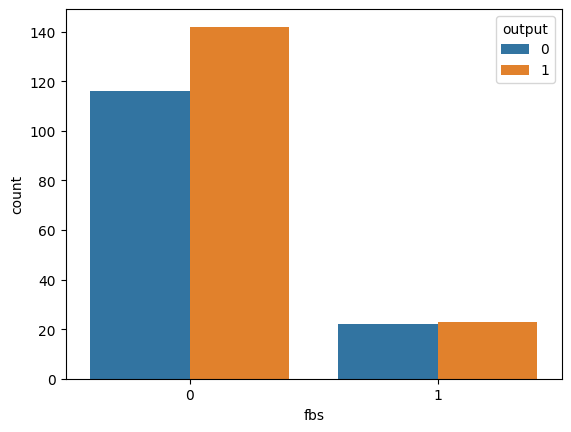

In [ ]:
sns.countplot(data = heart, x = 'fbs', hue = 'output')
plt.show()

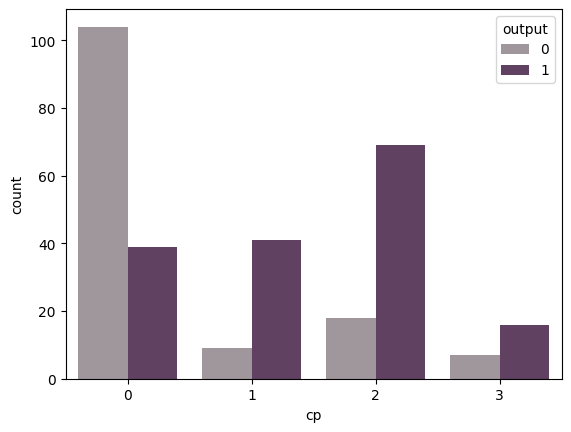

In [ ]:
sns.countplot(data = heart, x = 'cp', hue = 'output',   palette =  ['#A0969C' , '#653B68' ] )
plt.show()

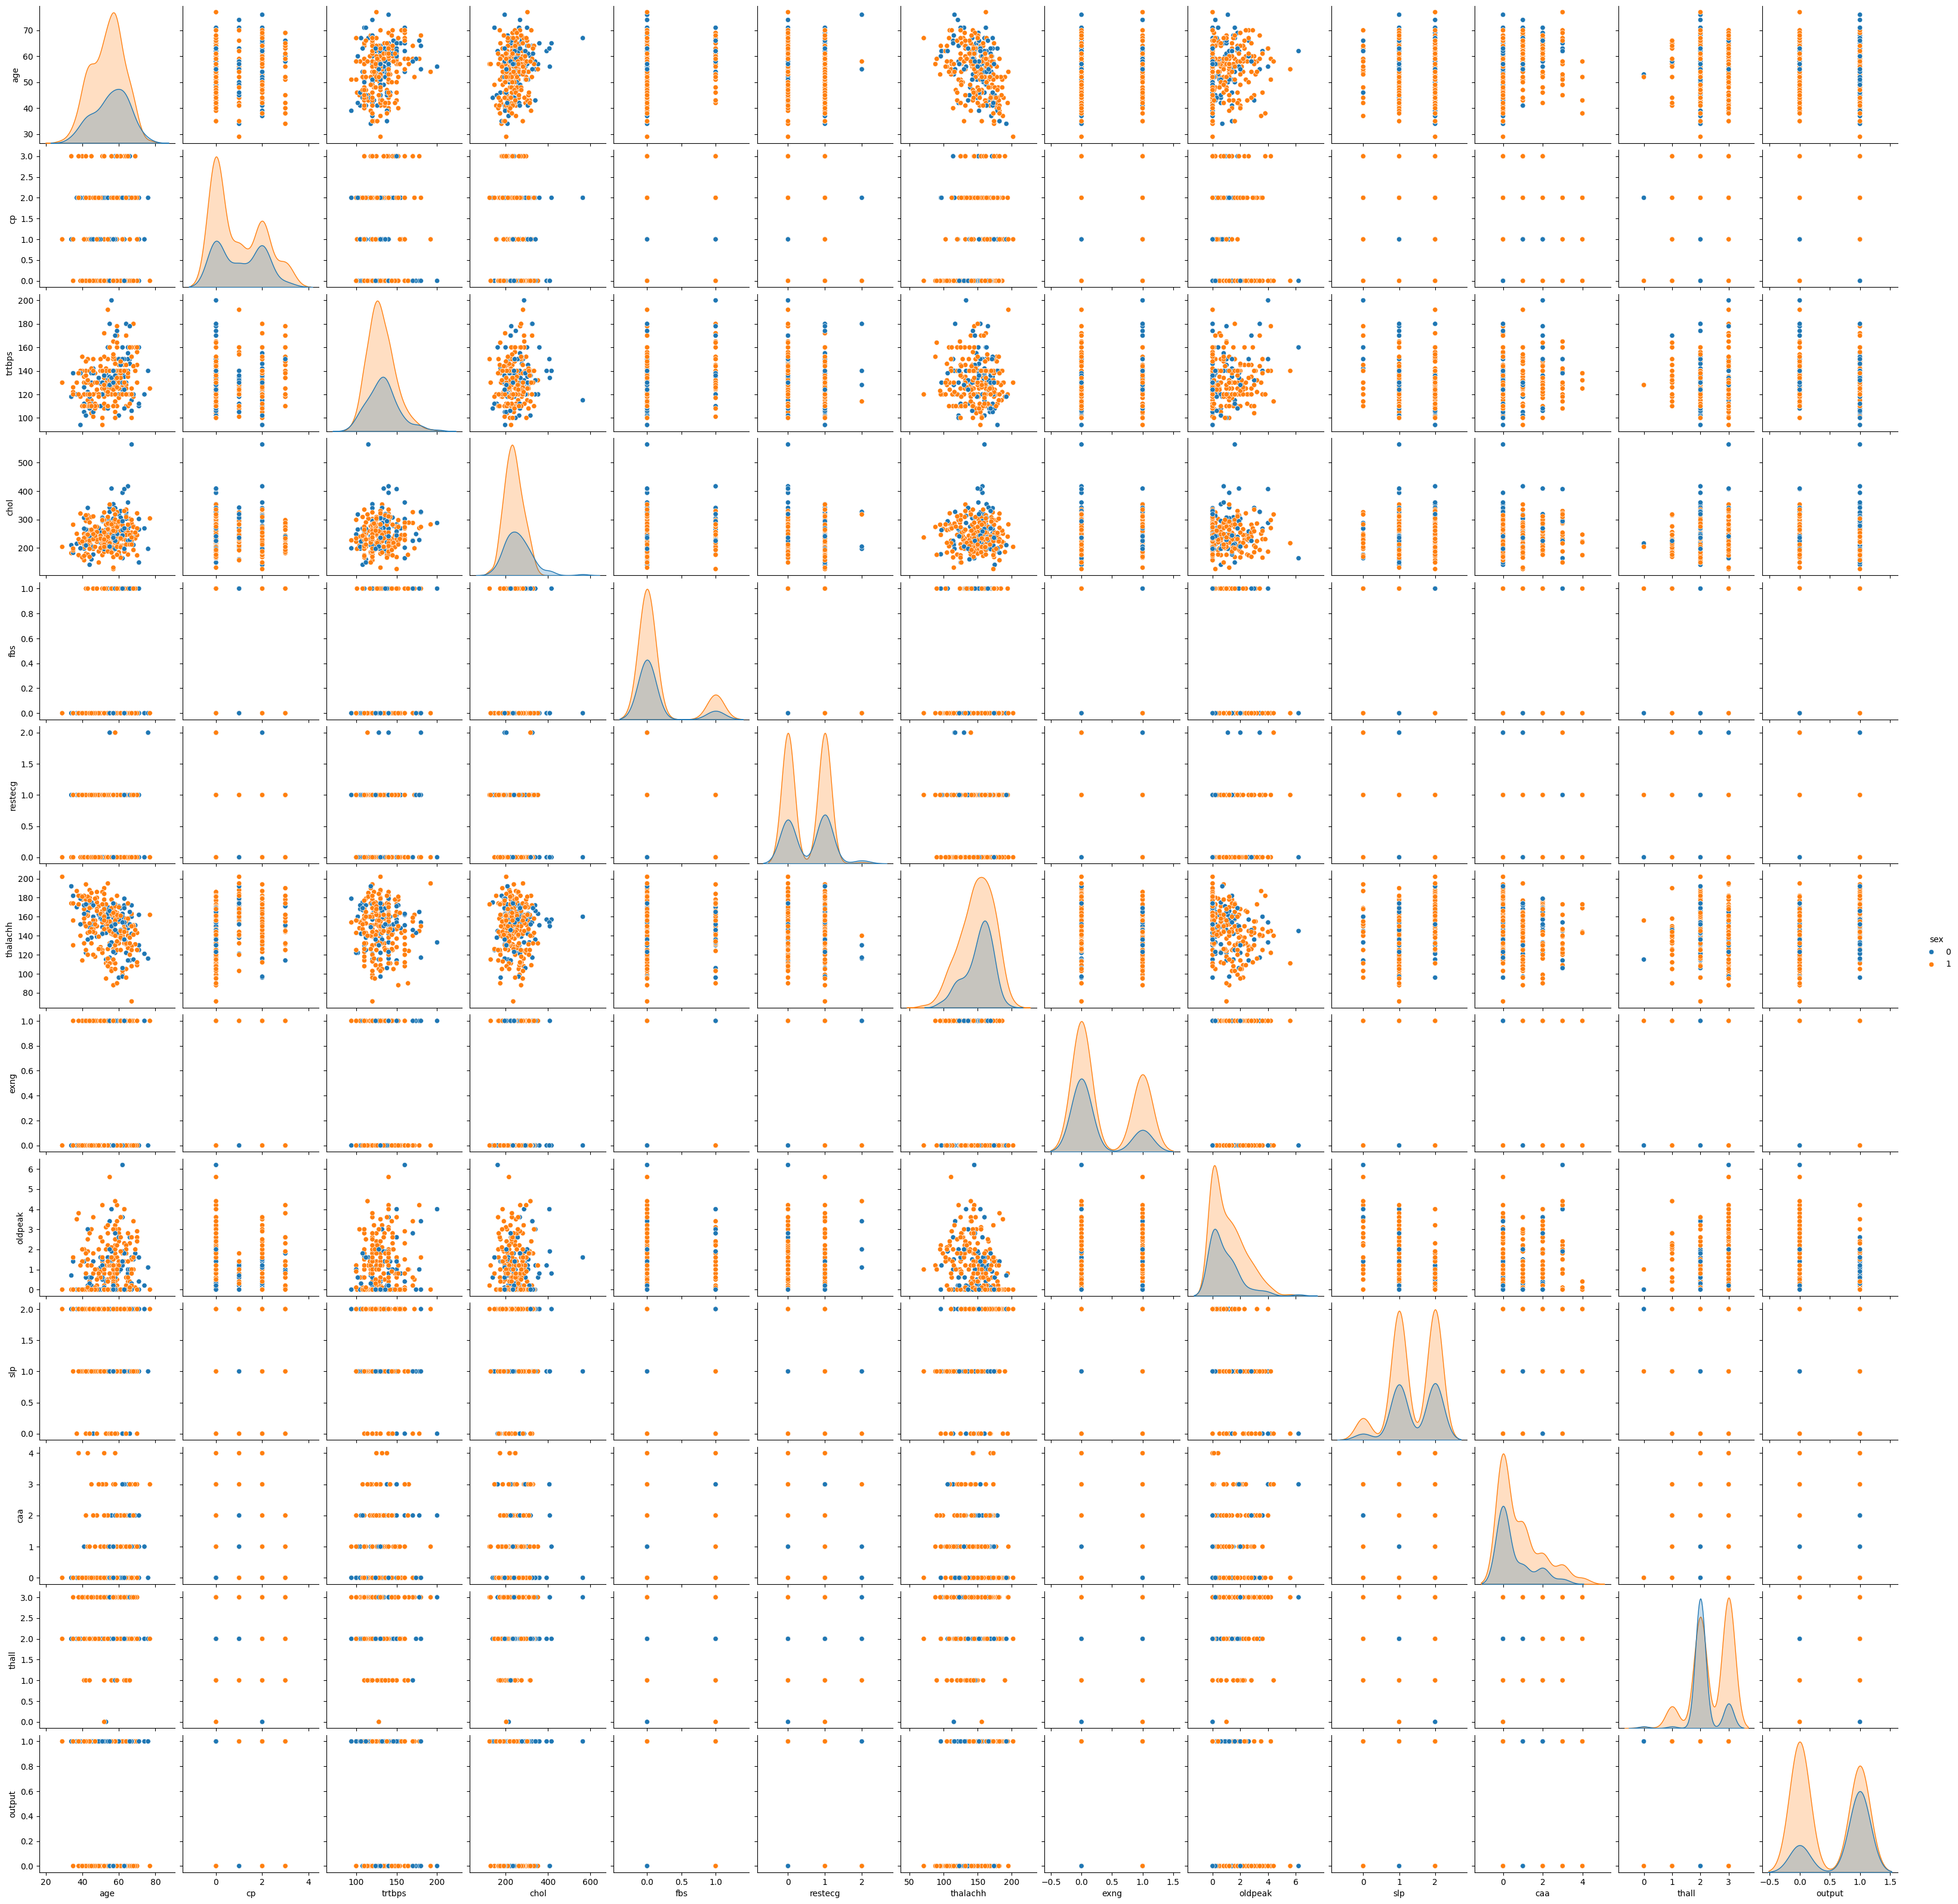

In [ ]:
sns.pairplot(heart,hue='sex', kind='scatter')
plt.show()

# train-test split

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [ ]:
x = heart[['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall']]

y = heart['output']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [ ]:
x.shape

(303, 13)

In [ ]:
y.shape

(303,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2,shuffle=True, random_state=0)

In [ ]:
print(f"X_train Shape : {x_train.shape}")
print(f"Y_train Shape : {y_train.shape}")
print(f"X_test  Shape : {x_test.shape}")
print(f"Y_test  Shape : {y_test.shape}")

X_train Shape : (242, 13)
Y_train Shape : (242,)
X_test  Shape : (61, 13)
Y_test  Shape : (61,)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


# Models



1.   Logostic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=100)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)
print(classification_report(y_test, y_pred_lr,))
score = accuracy_score(y_test, y_pred_lr)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy:   0.852




2.   Random Forest




In [ ]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))
score = accuracy_score(y_test, y_pred_rf)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy:   0.852




3. Support Vector Machine


In [ ]:
from sklearn import svm
clft = svm.SVC(probability=True)
clft.fit(x_train, y_train)
Pred_svm = clft.predict(x_test)
print(classification_report(y_test, Pred_svm))
score = accuracy_score(y_test, Pred_svm)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy:   0.852


4. Knn


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.classification_report(y_test,y_pred))
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.83      0.71      0.77        28
           1       0.78      0.88      0.83        33

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

accuracy:   0.852


5. XGboost

In [ ]:
xgb_c = xgb.XGBClassifier(n_estimators= 100)
xgb_c.fit(x_train, y_train)
y_pred_xgb = xgb_c.predict(x_test)
print(classification_report(y_test, y_pred_xgb))
score = accuracy_score(y_test, y_pred_xgb)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.77      0.82      0.79        28
           1       0.84      0.79      0.81        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61

accuracy:   0.803


6. Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred_NB = gnb.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, y_pred_NB,))
score = accuracy_score(y_test, y_pred_NB)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        28
           1       0.80      0.85      0.82        33

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61

accuracy:   0.803


7. Stacking

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier

estimators = [
     ('lr', lr),
     ('rf', rf),
     ('svm' ,clft),
     ('knn', knn)
]
lgclassifier = LogisticRegression(random_state=123,solver='lbfgs',class_weight='balanced', max_iter=10000)

sclf = StackingClassifier(estimators=estimators,
                            final_estimator=lgclassifier,
                            cv=10)

stack_pred = sclf.fit(x_train, y_train).predict(x_test)
print(classification_report(y_test, stack_pred))
score = accuracy_score(y_test, stack_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy:   0.852


8. ensemble (hard voting)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

ensemble_model = VotingClassifier(estimators = [('rf', rf), ('svm' ,clft),('knn', knn), ('xgb', xgb_c) ], voting = 'hard')
ensembel_model = ensemble_model.fit(x_train, y_train)
ensemble_pred = ensemble_model.predict(x_test)
print(classification_report(y_test, ensemble_pred))
score = accuracy_score(y_test, ensemble_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.86      0.86      0.86        28
           1       0.88      0.88      0.88        33

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

accuracy:   0.869


9. ensemble (soft voting)

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier

ensemble_model = VotingClassifier(estimators = [('rf', rf), ('svm' ,clft),('knn', knn), ('xgb', xgb_c) ], voting = 'soft')
ensembel_model = ensemble_model.fit(x_train, y_train)
ensemble_pred = ensemble_model.predict(x_test)
print(classification_report(y_test, ensemble_pred))
score = accuracy_score(y_test, ensemble_pred)
print("accuracy:   %0.3f" % score)

              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.85      0.88      0.87        33

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61

accuracy:   0.852


In [ ]:
print(y_test)

24     1
67     1
13     1
112    1
80     1
      ..
160    1
234    0
110    1
190    0
253    0
Name: output, Length: 61, dtype: int64


In [ ]:
df = pd.DataFrame(y_test)
df

,output
24,1
67,1
13,1
112,1
80,1
...,...
160,1
234,0
110,1
190,0


In [ ]:
df['predicted'] = ensemble_pred

In [ ]:
df

,output,predicted
24,1,1
67,1,1
13,1,1
112,1,1
80,1,1
...,...,...
160,1,1
234,0,0
110,1,0
190,0,0
